# Marketing Research Questions

In the marketing department of a auto insurance company, they want to determine whether a marketing campaign will attract more customers or retain current customers.  They will investigat whether a potential or current customer will respond to the campaign or not.  In my analysis, I will use customer demographics data to predict whether a customer will respond to a marketing campaign or not.  I will determine the most important customer attributes that will predict the response of a customer to the campaign.  The marketing department is also concerned will how much value will a customer bring to the company during his or her lifetime  with the company.  This is also known as customer lifetime value or CLV.  I will predict CLV of a customer and determine the important customer attributes in predicting CLV.  Here are questions I will answer in this analysis:
1. Based on the customers' attributes, will they respond to a marketing campaign or not?
2. What are the important customer attributes that determine the response to a marketing campaign?
3. Based on a customer's attributes, how much CLV will a new customer bring to the company? 

# Description of the Data Set

The dataset was derived from: https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data
This dataset is an unidentified auto insurance company's customer' demographics.  The dataset includes 24 variables.  

There are two target variables which are customer lifetime value and response.  According to Wikipedia, customer lifetime value refers to a prediction of the net profit attributed to the entire future relationship with a customer.  I will conduct research in predicting the customer's lifetime value to determine whether a customer will be a highly profitable customer or lower profitable customer. 

The other target variable is response which refers to whether a customer responded to the company's marketing campaign or not. There is one predictor variable labeled renewal offer type is an attempt by the company to offer their customers a product to keep them that will assist in predicting response or not.  There are more predictor variables I will explore in relation to response and CLV.

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Support Vector Regressor and Support Vector Machine.
from sklearn.svm import SVR
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Random Forest libraries.
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# XGBoost libraries.
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# Logistic Regression libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

# Linear Regression libraries.
from scipy import stats
from scipy.stats import norm, skew
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
import warnings
warnings.filterwarnings('ignore')

C:\Users\rob42\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploring the Dataframe

In [17]:
# Loading data set from github.
market_df = pd.read_csv('https://raw.githubusercontent.com/rruss2/customer_value_analysis/master/marketing_customer_value_analysis.csv')

# Displaying the first five rows and column headings.
market_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [18]:
# Check the shape of the data set.  (9,134 rows and 24 columns)
market_df.shape

(9134, 24)

In [19]:
# Display the number of observations, data types, and name of each column.
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [20]:
# Verify there are no null values.
market_df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [21]:
# Display summary statistics for all variables.
market_df.describe(include='all')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,TR40401,California,NaN,No,Basic,Bachelor,1/10/2011,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


# Target Variable Analysis

In [22]:
# Convert 'Response' values to numeric values.
market_df.Response = (market_df.Response == 'Yes').astype(int)

In [23]:
# Total number of no (0) and yes (1).
market_df.groupby('Response').count()['Customer']

Response
0    7826
1    1308
Name: Customer, dtype: int64

In [24]:
# Percent breakdown of the non/engagment rates.
market_df.groupby('Response').count()['Customer']/market_df.shape[0]

Response
0    0.856799
1    0.143201
Name: Customer, dtype: float64

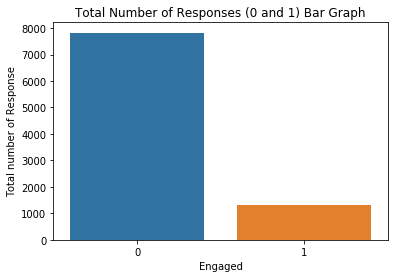

In [25]:
# Create bar graph of the responses of no and yes.
sns.countplot('Response', data = market_df)
plt.xlabel('Engaged')
plt.ylabel('Total number of Response')
plt.title('Total Number of Responses (0 and 1) Bar Graph')
plt.show()

The low response rate is a concern of the marketing department.  Later in my analysis, I will investigate the most important customer attributes in predicting response to the marketing calls.

There exist a class imbalance.  There are clearly more no responses than yes responses.  Before I execute different models to predict response and CLV, I will apply SMOTE (Synthetic Mniority Oversampling Technique) to balance the classes for the classification models.  

# Feature Selection and Engineering

I can eliminate three variables irrelevant to the analysis.  Customer variable is ids for each customer, Effective To Date variable is dates, and Policy variable repeats the categories of Policy Type and Policy has different levels.  

In [26]:
# Create new dataframe by eliminating three variables.
new_market_df = market_df.drop(['Customer', 'Effective To Date', 'Policy'], 1)

# Verify the variables were dropped.
new_market_df.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [27]:
# Split the categorical and numeric variables to analyze seperately.
numeric_df = [f for f in new_market_df.columns if market_df.dtypes[f] != 'object']
categorical_df = [f for f in new_market_df.columns if market_df.dtypes[f] == 'object']

In [28]:
# Create dataframe for categorical variables and display top rows.
categorical_df = new_market_df[categorical_df]
categorical_df.head()

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Two-Door Car,Medsize
3,California,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Offer1,Call Center,SUV,Medsize
4,Washington,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Offer1,Agent,Four-Door Car,Medsize


In [29]:
# Display summary statistics for categorical variables.
categorical_df.describe(include='all')

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,5,3,5,5,2,3,3,3,4,4,6,3
top,California,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Offer1,Agent,Four-Door Car,Medsize
freq,3150,5568,2748,5698,4658,5779,5298,6788,3752,3477,4621,6424


In [30]:
# List of categorical columns to apply label encoding.
cols = ['Coverage', 'Education', 'Vehicle Class', 'Vehicle Size']
lab_categorical_df = categorical_df[['Coverage', 'Education', 'Vehicle Class', 'Vehicle Size']]

# List of categorical columns to apply get_dummies().
dum_cols = ['State', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
           'Policy Type', 'Renew Offer Type', 'Sales Channel']
dum_categorical_df = categorical_df[['State', 'EmploymentStatus', 'Gender', 'Location Code',
                                     'Marital Status', 'Policy Type', 'Renew Offer Type',
                                     'Sales Channel']]

In [31]:
# Convert ordinal categorical variables with label encoding.
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in lab_categorical_df[cols]:
    lab_categorical_df[col] = lb.fit_transform(lab_categorical_df[col])

In [32]:
# Convert nominal categorical variables with get_dummies().
dum_categorical_df = pd.get_dummies(dum_categorical_df)

In [33]:
# Combining the two categorical data frames.
cat_df = pd.concat([lab_categorical_df, dum_categorical_df], axis=1)

In [34]:
# Verify pd.concat() worked.
cat_df.head(1)

,Coverage,Education,Vehicle Class,Vehicle Size,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,...,Policy Type_Personal Auto,Policy Type_Special Auto,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
0,0,0,5,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [35]:
# Create dataframe for categorical variables and display top rows.
num_df = new_market_df[numeric_df]
num_df.head()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,0,56274,69,32,5,0,1,384.811147
1,6979.535903,0,0,94,13,42,0,8,1131.464935
2,12887.431650,0,48767,108,18,38,0,2,566.472247
3,7645.861827,0,0,106,18,65,0,7,529.881344
4,2813.692575,0,43836,73,12,44,0,1,138.130879


# Exploratory Data Analysis

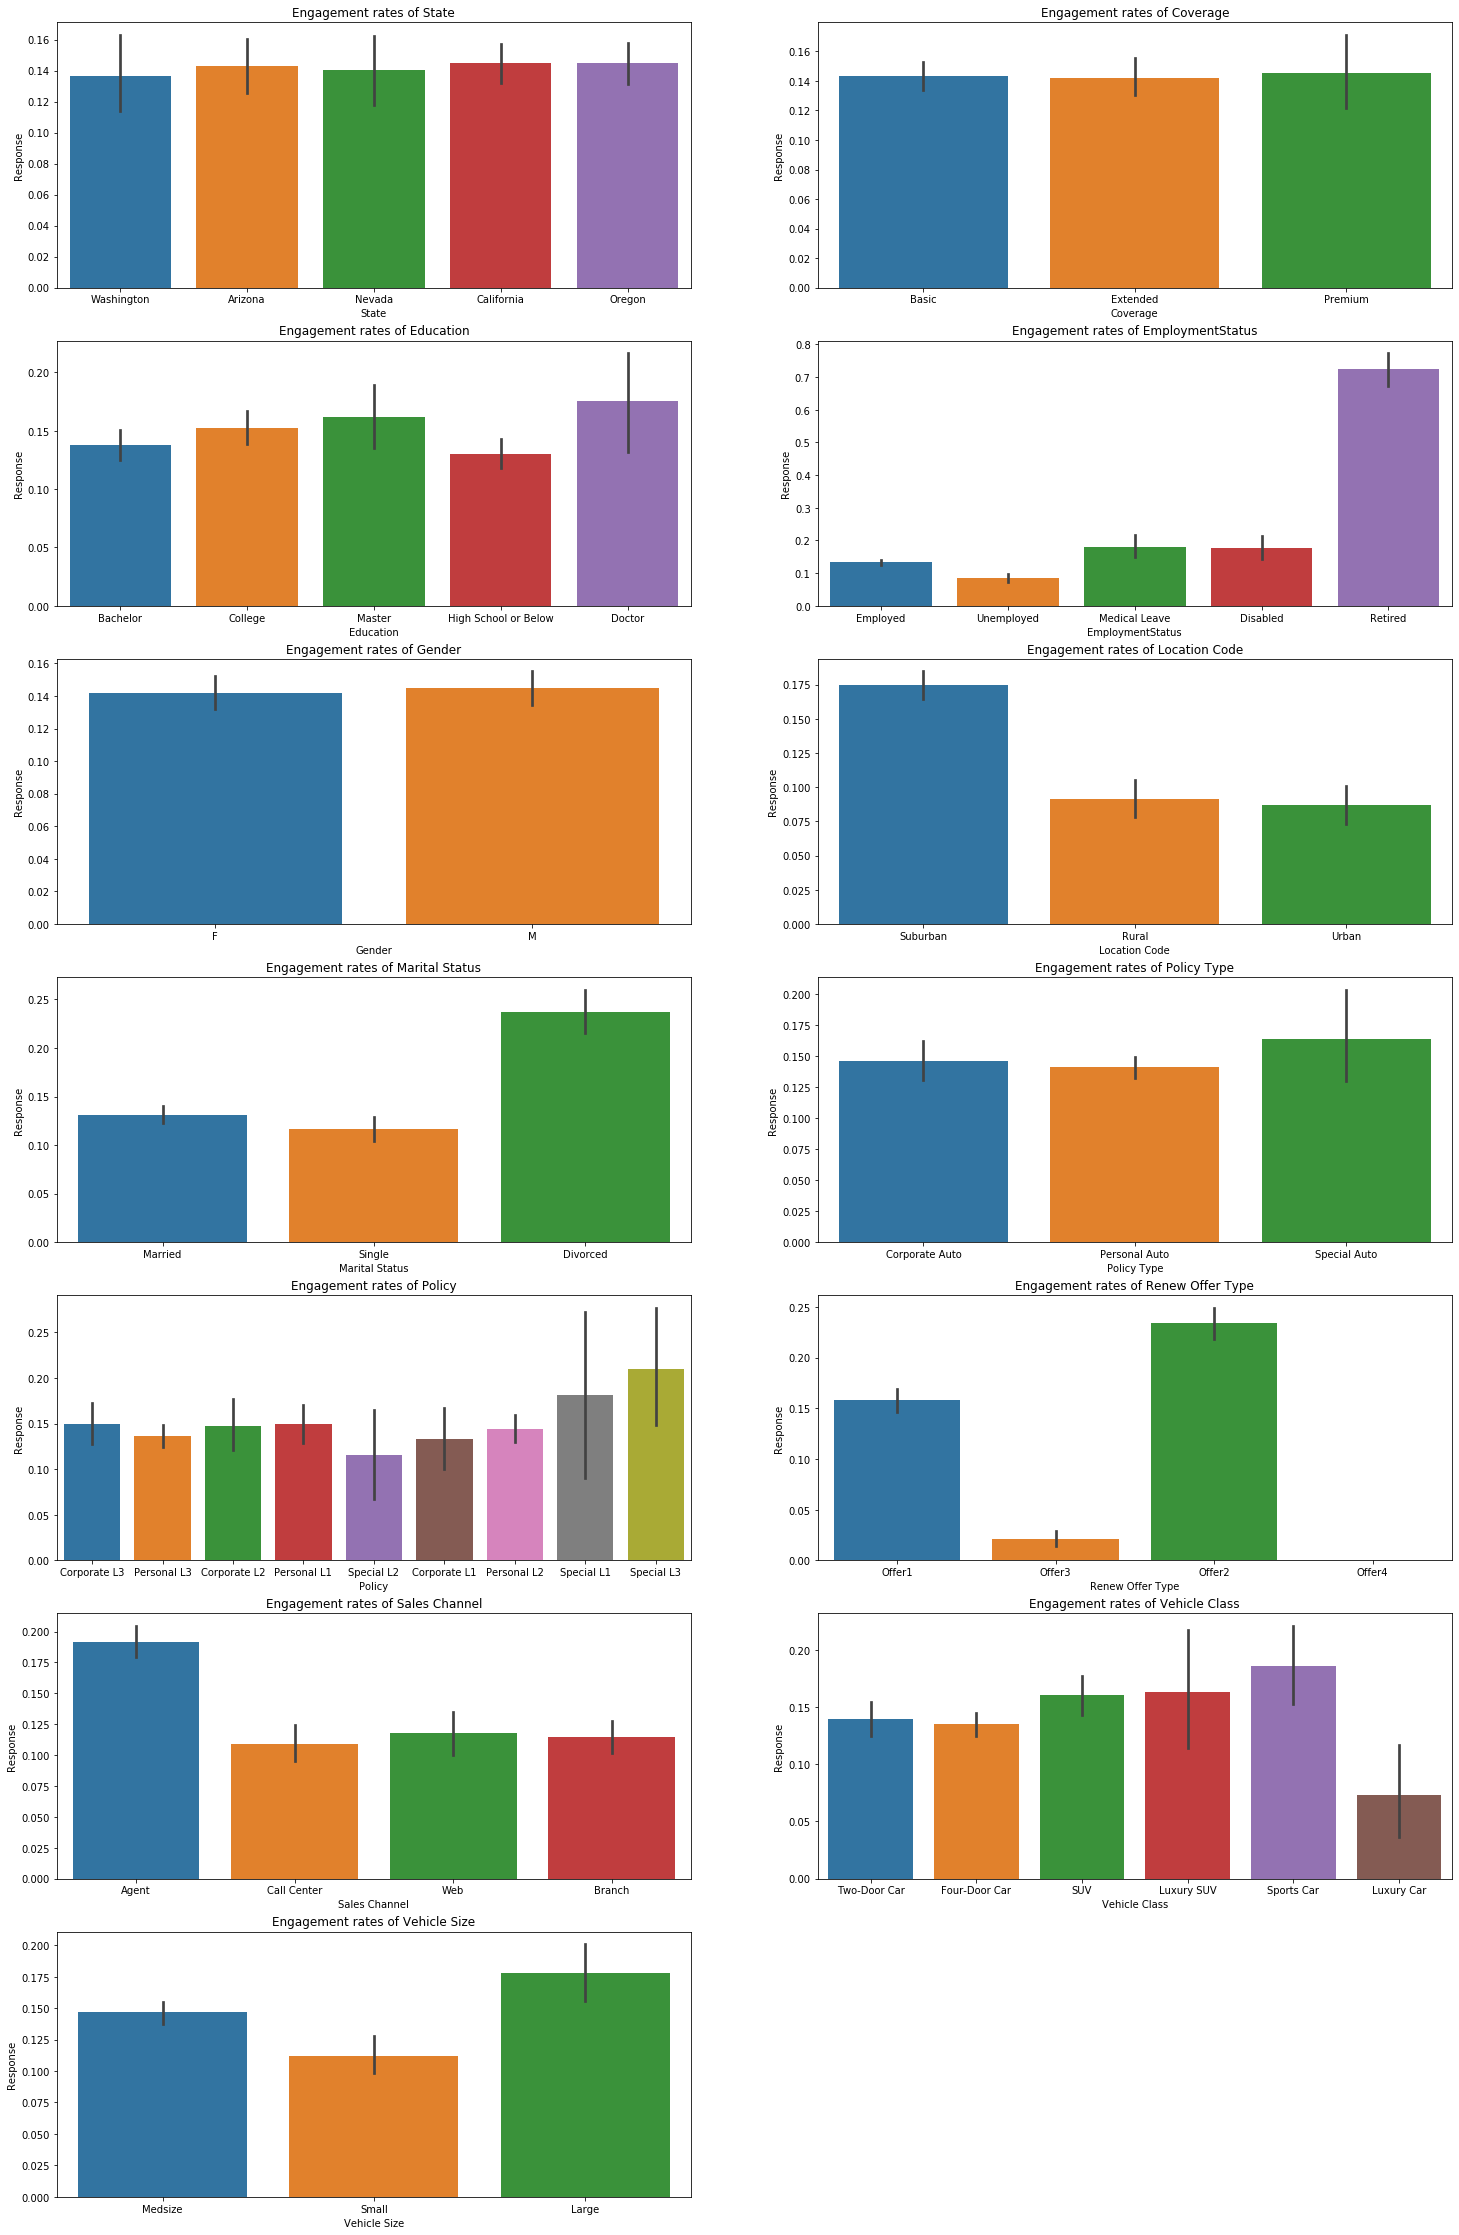

In [36]:
# Display the bar charts for the categorical variables to response. 
all_columns = ['State', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size']

plt.figure(figsize=(25, 40))

for i in range(len(all_columns)):
    plt.subplot(7, 2, i + 1)
    sns.barplot(x="{}".format(all_columns[i]), y="Response", data=market_df)
    plt.title('Engagement rates of {}'.format(all_columns[i]))       

The bar graphs give me some insight on relationships between the engagement rate and categorical variables.  I can see how the unique values of each categorical variable relates to the engagement rate.  For example, the renew offer type 4 has the lowest engagement versus renew offer type 2 is the highest.  The marketing department can use this information to create strategies to increase engagement in renew offer type 4 or eliminate it and focus more of their attention on the renew offer type 1 and 2.  Another insight is with the Sales Channel bar graphs.  I can see that Agents has the most engagement than the other channels.  The marketing department may consider focusing on collaborating with the agents in creating marketing champaigns to retain customers or finding new customers.  Later in my analysis, I will do more investigation in the relationships between categorical variables and target variable.   

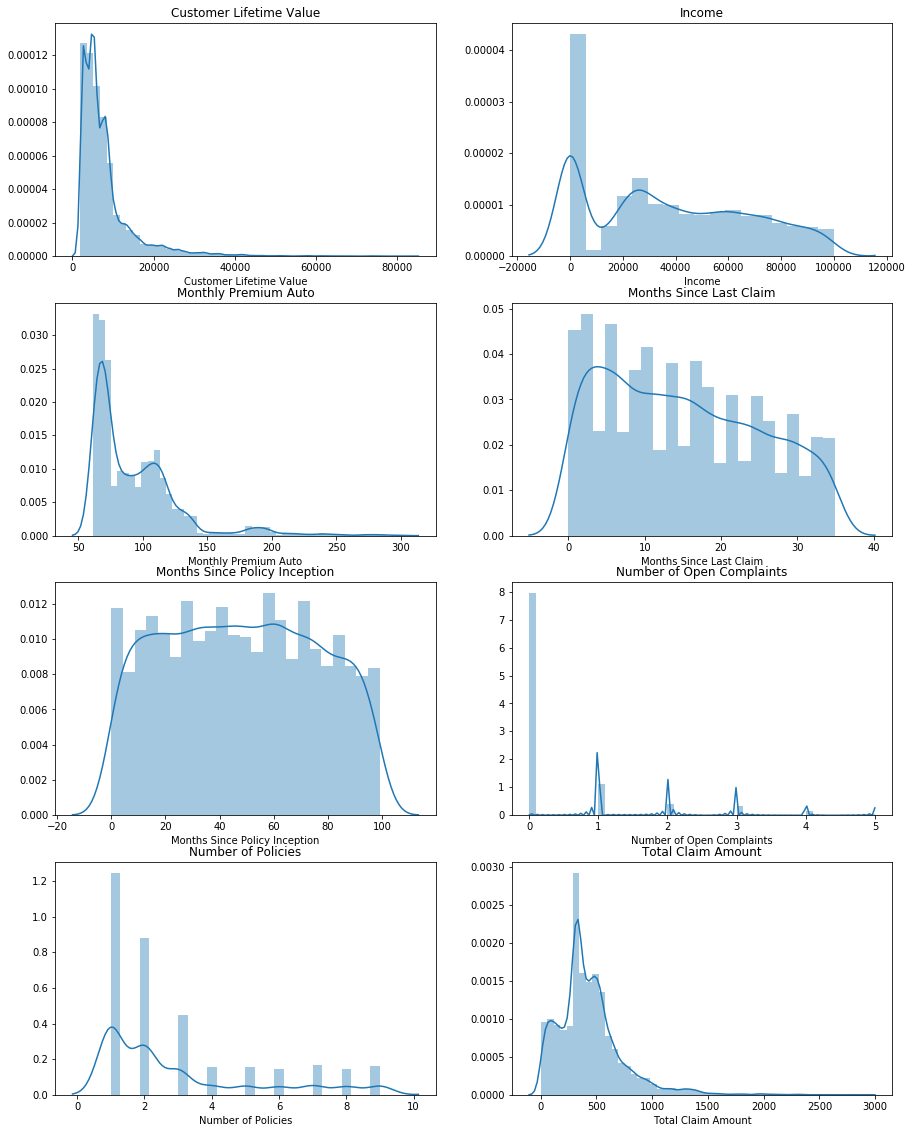

In [37]:
# Check the distributions of the numeric variables.
num_all_columns = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount']

plt.figure(figsize=(15, 30))

for i in range(len(num_all_columns)):
    plt.subplot(6, 2, i + 1)
    sns.distplot(num_df[num_all_columns[i]])
    plt.title(num_all_columns[i])

According to the distributions of the numeric variables, most of them are not normally distributed.  Before I executing classification and regression models, I will normalize the numeric variables.

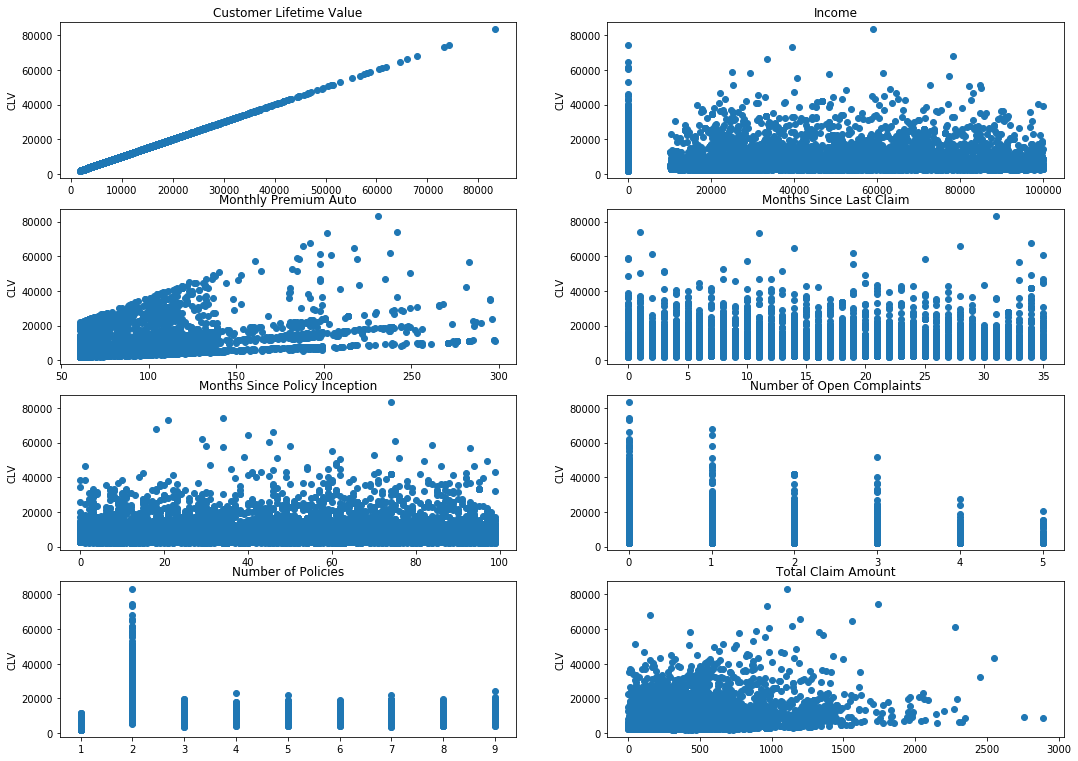

In [38]:
# Scatterplots for numeric variables versus CLV.
plt.figure(figsize=(18, 20))

for i in range(len(num_all_columns)):
    plt.subplot(6, 2, i + 1)
    plt.scatter(num_df[num_all_columns[i]], num_df['Customer Lifetime Value'])
    plt.ylabel("CLV")
    plt.title(num_all_columns[i])
plt.show()

The scatterplots tell me the relationships with the numeric variables to the target variable vary greatly.  It appears that the variables number of open complaints and number of policies might be categorical variables because of their discrete values.  I will keep these variables with the numeric variables for the rest of the analysis.

# Discover Relationships Among Variables

In [39]:
# Logistic regression among the numerical variables with response target variable.
num_X = num_df.drop(['Response'], 1)
num_Y = num_df['Response']

In [40]:
# Fitting the logistic regression to the numerical variables.
num_logit = sm.Logit(num_Y, num_X).fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [41]:
# Summary of the results from logistic regression of the numerical variables.
num_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Wed, 12 Feb 2020   Pseudo R-squ.:                -0.02546
Time:                        06:52:31   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

I can see the p-values of the coefficient estimates that Total Claim Amount has a high p-value of 0.477, which means Total Claim Amount is statistically insignificant.  I will eliminate it from the data before executing machine learning models on the data.

The signs of the coefficients tell me the relationship of the numeric variables to Response.  I can see Income has a negative sign which means the more a customer makes the lower their response to a marketing champaign.  The one surprise is the higher a customer's monthly premium auto the lower their response.  I assumes they want a better rate.  According to this data, people who can afford higher premiums are less likely to respond to marketing campaigns.  People with higher incomes make more informed decisions and less likely to be persuaded with marketing campaigns.

In [42]:
# Numerical varibles correlation to check for multicollinearity.
num_corr_matrix = round(num_df.corr(), 3)
num_corr_matrix

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000,-0.009,0.024,0.396,0.012,0.009,-0.036,0.022,0.226
Response,-0.009,1.000,0.012,0.011,-0.017,0.003,-0.010,-0.021,0.017
Income,0.024,0.012,1.000,-0.017,-0.027,-0.001,0.006,-0.009,-0.355
Monthly Premium Auto,0.396,0.011,-0.017,1.000,0.005,0.020,-0.013,-0.011,0.632
Months Since Last Claim,0.012,-0.017,-0.027,0.005,1.000,-0.043,0.005,0.009,0.008
Months Since Policy Inception,0.009,0.003,-0.001,0.020,-0.043,1.000,-0.001,-0.013,0.003
Number of Open Complaints,-0.036,-0.010,0.006,-0.013,0.005,-0.001,1.000,0.001,-0.014
Number of Policies,0.022,-0.021,-0.009,-0.011,0.009,-0.013,0.001,1.000,-0.002
Total Claim Amount,0.226,0.017,-0.355,0.632,0.008,0.003,-0.014,-0.002,1.000


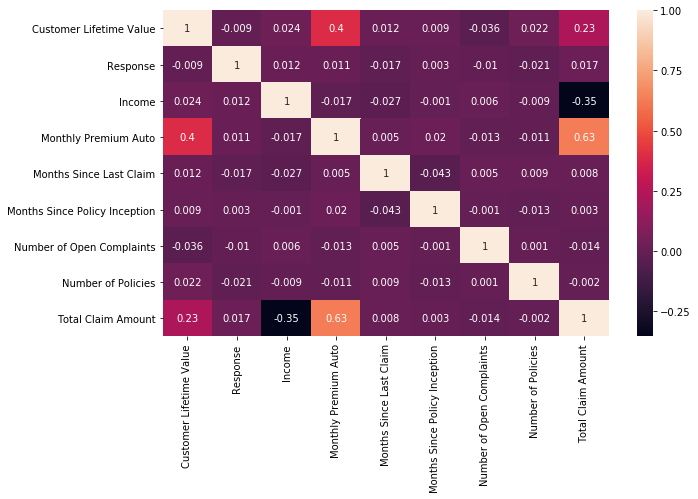

In [43]:
# Heatmap of the numerical variables.
plt.figure(figsize=(10,6))
sns.heatmap(num_corr_matrix, annot=True)
plt.show()

From the heatmap, I see there are two variables that are highly correlated.  Those variables are Total Claim Amount and Monthly Premium Auto.  The other variables do not appear to be highly correlated.  I may eliminate one of the variables: Total Claim Amount and Monthly Premium Auto to see how this affects the results of my linear regression.  

In [44]:
# Eliminate Total Claim Amount.
num_df = num_df.drop(['Total Claim Amount'], 1)

In [45]:
# Logistic regression among the categorical variables with target variable.
cat_X = cat_df
cat_Y = num_df['Response']

In [46]:
# Added Response variable to the new_categorical_df.
cat_df['Response'] = num_df['Response']

In [47]:
# Categorical varibles correlation to check for multicollinearity.
cat_corr_matrix = round(cat_df.corr(), 3)
cat_corr_matrix

,Coverage,Education,Vehicle Class,Vehicle Size,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Disabled,...,Policy Type_Special Auto,Renew Offer Type_Offer1,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Response
Coverage,1.000,0.022,-0.018,-0.004,-0.008,0.001,0.016,-0.003,-0.003,-0.005,...,0.002,0.057,-0.033,-0.011,-0.028,0.016,0.010,-0.015,-0.018,0.001
Education,0.022,1.000,0.010,-0.005,-0.003,-0.017,0.016,-0.004,0.021,0.019,...,0.001,-0.067,0.030,0.006,0.053,0.002,0.007,-0.010,-0.000,0.000
Vehicle Class,-0.018,0.010,1.000,-0.012,-0.015,-0.003,0.014,0.012,-0.007,0.016,...,-0.008,0.013,0.001,-0.015,-0.006,-0.010,0.016,0.010,-0.017,0.021
Vehicle Size,-0.004,-0.005,-0.012,1.000,-0.008,-0.008,0.015,0.011,-0.010,0.006,...,0.010,-0.001,-0.015,0.005,0.018,0.005,-0.011,0.010,-0.004,-0.051
State_Arizona,-0.008,-0.003,-0.015,-0.008,1.000,-0.347,-0.157,-0.302,-0.148,0.012,...,0.009,-0.002,0.003,-0.002,0.000,-0.003,-0.006,0.017,-0.007,-0.001
State_California,0.001,-0.017,-0.003,-0.008,-0.347,1.000,-0.237,-0.458,-0.224,-0.010,...,-0.020,-0.008,0.000,0.011,-0.001,0.001,0.008,-0.002,-0.008,0.003
State_Nevada,0.016,0.016,0.014,0.015,-0.157,-0.237,1.000,-0.206,-0.101,-0.000,...,-0.003,0.003,0.000,-0.008,0.005,-0.004,-0.001,-0.007,0.015,-0.002
State_Oregon,-0.003,-0.004,0.012,0.011,-0.302,-0.458,-0.206,1.000,-0.195,0.006,...,0.019,0.003,0.000,-0.004,-0.001,-0.001,-0.006,-0.003,0.014,0.002
State_Washington,-0.003,0.021,-0.007,-0.010,-0.148,-0.224,-0.101,-0.195,1.000,-0.008,...,-0.006,0.009,-0.006,-0.002,-0.002,0.009,0.007,-0.007,-0.013,-0.006
EmploymentStatus_Disabled,-0.005,0.019,0.016,0.006,0.012,-0.010,-0.000,0.006,-0.008,1.000,...,0.003,0.063,-0.046,-0.010,-0.019,-0.017,0.004,0.017,-0.001,0.021


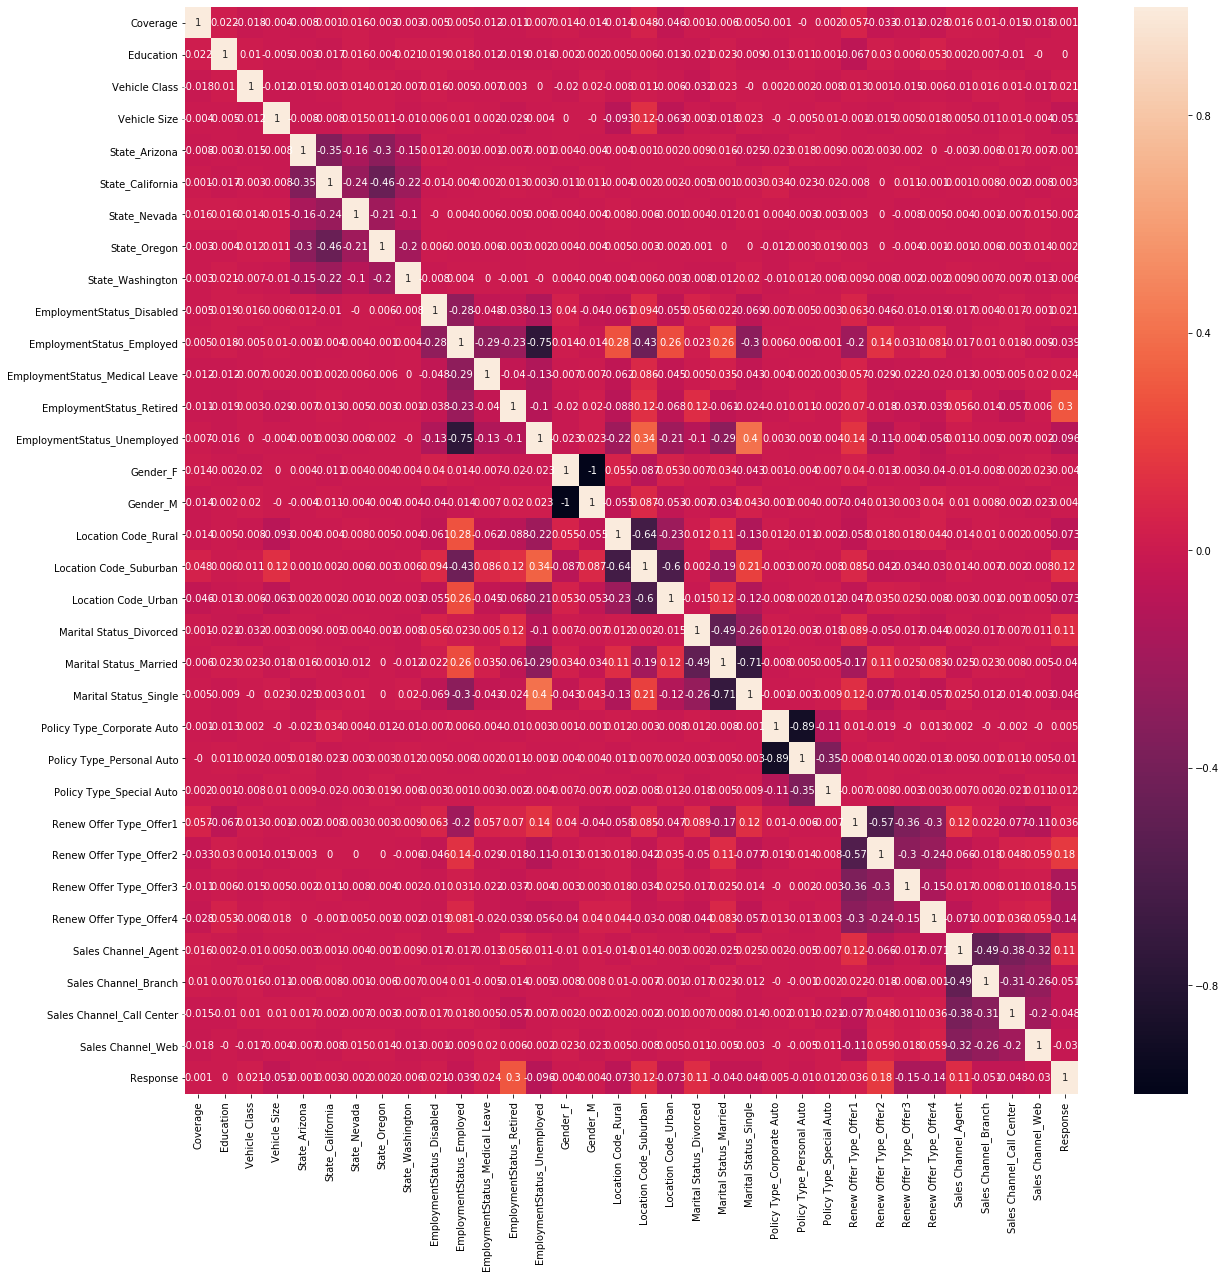

In [48]:
# Heatmap of the correlations of the categorical variables.
plt.figure(figsize=(20,20))
sns.heatmap(cat_corr_matrix, annot=True)
plt.show()

I can see from the heatmap of the categorical variables that the highly correlated variables are the levels created from one hot encoding within the categorical variables.  I will investigate whether to eliminate.

# Outlier Analysis

In [49]:
# Display summary statistics to check for outliers.
num_df.describe()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,0.143201,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170
std,6870.967608,0.350297,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182
min,1898.007675,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000
25%,3994.251794,0.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000
50%,5780.182197,0.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000
75%,8962.167041,0.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000
max,83325.381190,1.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000


I see there are several variables with outliers based on their min and max values compared to their medians.  I want to verify their are outliers and correct them in the next sections of my analysis.

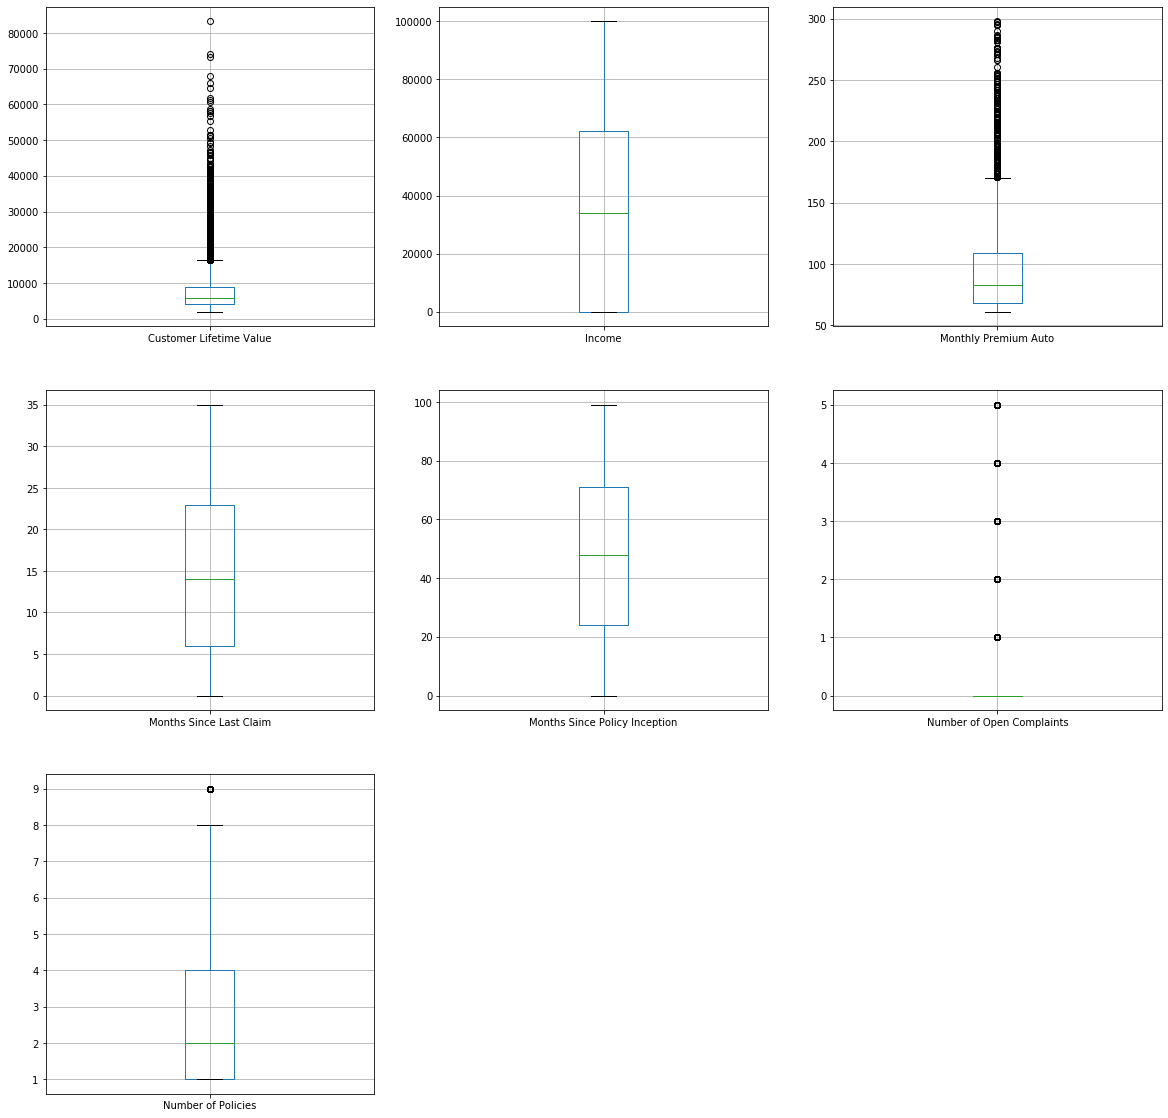

In [50]:
# Detecting outliers through plotting box plots
plt.figure(figsize=(20,20))
for i, col in enumerate(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies'], start=1):
    plt.subplot(3, 3, i)
    num_df.boxplot(col,whis=1.5)
    
plt.show()

In [51]:
# Calculate number of outliers and its percentage with Tukey's method.
for i, col in enumerate(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies'], start=1):
    q75, q25 = np.percentile(num_df[col], [75, 25])
    iqr = q75 - q25
    
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(col,
                                                                            len((np.where((num_df[col] > max_val) | 
                                                                                           (num_df[col] < min_val))[0])),
                                                                             len((np.where((num_df[col] > max_val) | 
                                                                                           (num_df[col] < min_val))[0]))*100/9134))

Number of outliers and percentage of it in Customer Lifetime Value : 817 and 8.94460258375301
Number of outliers and percentage of it in Income : 0 and 0.0
Number of outliers and percentage of it in Monthly Premium Auto : 430 and 4.707685570396322
Number of outliers and percentage of it in Months Since Last Claim : 0 and 0.0
Number of outliers and percentage of it in Months Since Policy Inception : 0 and 0.0
Number of outliers and percentage of it in Number of Open Complaints : 1882 and 20.604335449967156
Number of outliers and percentage of it in Number of Policies : 416 and 4.554412086708999


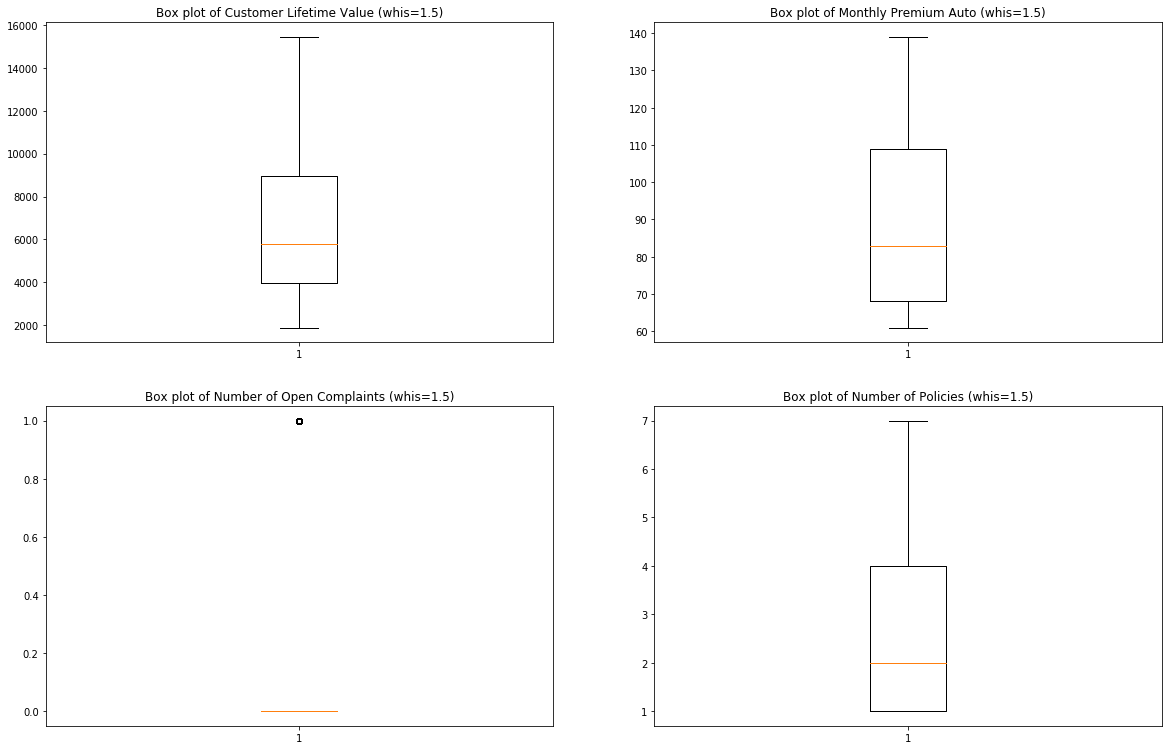

In [52]:
# Winsorize the 5 columns with outliers and plotting them.
import scipy
import scipy.stats
from scipy.stats.mstats import winsorize
plt.figure(figsize=(20,20))

plt.subplot(3,2,1)
winsorized_Customer_Lifetime_Value = winsorize(num_df["Customer Lifetime Value"], (0, 0.10))
plt.boxplot(winsorized_Customer_Lifetime_Value)
plt.title("Box plot of Customer Lifetime Value (whis=1.5)")

plt.subplot(3,2,2)
winsorized_Monthly_Premium_Auto = winsorize(num_df["Monthly Premium Auto"], (0, 0.06))
plt.boxplot(winsorized_Monthly_Premium_Auto)
plt.title("Box plot of Monthly Premium Auto (whis=1.5)")

plt.subplot(3,2,3)
winsorized_Number_of_Open_Complaints = winsorize(num_df["Number of Open Complaints"], (0.10, 0.20))
plt.boxplot(winsorized_Number_of_Open_Complaints)
plt.title("Box plot of Number of Open Complaints (whis=1.5)")

plt.subplot(3,2,4)
winsorized_Number_of_Policies = winsorize(num_df["Number of Policies"], (0.05, 0.10))
plt.boxplot(winsorized_Number_of_Policies)
plt.title("Box plot of Number of Policies (whis=1.5)")

plt.show()

The variable Number of Open Complaints still has an outlier because the values are discrete.  I was unable to correct for outliers.

In [53]:
# Add variables to the num_df dataframe
num_df['winsorized_Customer_Lifetime_Value'] = winsorized_Customer_Lifetime_Value
num_df['winsorized_Monthly_Premium_Auto'] = winsorized_Monthly_Premium_Auto
num_df['winsorized_Number_of_Open_Complaints'] = winsorized_Number_of_Open_Complaints
num_df['winsorized_Number_of_Policies'] = winsorized_Number_of_Policies

In [54]:
# Verify the winsorized columns were added to the dataframe. 
num_df.head()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,winsorized_Customer_Lifetime_Value,winsorized_Monthly_Premium_Auto,winsorized_Number_of_Open_Complaints,winsorized_Number_of_Policies
0,2763.519279,0,56274,69,32,5,0,1,2763.519279,69,0,1
1,6979.535903,0,0,94,13,42,0,8,6979.535903,94,0,7
2,12887.431650,0,48767,108,18,38,0,2,12887.431650,108,0,2
3,7645.861827,0,0,106,18,65,0,7,7645.861827,106,0,7
4,2813.692575,0,43836,73,12,44,0,1,2813.692575,73,0,1


In [55]:
# Eliminate the numeric variables that were winsorized in new_numeric_df.
num_df = num_df.drop(["Customer Lifetime Value",
                                     "Monthly Premium Auto",
                                     "Number of Open Complaints",
                                     "Number of Policies"], 1)

In [56]:
# Verify the columns were dropped.
num_df.columns

Index(['Response', 'Income', 'Months Since Last Claim',
       'Months Since Policy Inception', 'winsorized_Customer_Lifetime_Value',
       'winsorized_Monthly_Premium_Auto',
       'winsorized_Number_of_Open_Complaints',
       'winsorized_Number_of_Policies'],
      dtype='object')

# Splitting and Normalizing the Data

At the beginning, I eliminated the three variables: Customers, Effective To Date, and Policy.    Based on the logistic regression analysis, there are two more variables I will eliminate which are Education and Gender.  In addition to eliminating these variables, I will split and normalize the numeric variables.

In [57]:
# Dropping Education, Gender, and Total Claim Amount.
cat_df = cat_df.drop(['Education', 'Gender_M', 'Gender_F'], 1)

In [58]:
# Drop 'Response'.
cat_df = cat_df.drop(['Response'], 1)

In [59]:
# Merging scaled numeric data frame and categorical data frame.
results_df = pd.concat([num_df, cat_df], axis=1)

In [60]:
# Define X and Y for training/testing datasets to use for ML models.
X2 = results_df.drop(['Response'], 1)
y2 = results_df['Response']

In [61]:
# Splitting the data into train (70%) and test (30%) data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.30, random_state=2)

In [62]:
# Split the categorical and numeric variables to analyze seperately.
num_X_train = [f for f in X_train.columns if X_train.dtypes[f] != 'uint8']
cat_X_train = [f for f in X_train.columns if X_train.dtypes[f] == 'uint8']

In [63]:
# Create data frame of the numeric variables.
num_X_train = X_train[num_X_train]

In [64]:
# Create data frame of the categorical variable.
cat_X_train = X_train[cat_X_train]

In [65]:
# Apply PowerTransformer to the training set.
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
scaled_num_X_train = pt.fit_transform(num_X_train)
num_X_train = pd.DataFrame(scaled_num_X_train, columns=num_X_train.columns)

In [66]:
# Verify transformation.
num_X_train.head(1)

,Income,Months Since Last Claim,Months Since Policy Inception,winsorized_Customer_Lifetime_Value,winsorized_Monthly_Premium_Auto,winsorized_Number_of_Open_Complaints,winsorized_Number_of_Policies,Coverage,Vehicle Class,Vehicle Size
0,0.886994,1.124057,1.214619,-0.055967,-0.608198,-0.52225,0.535809,-0.796897,-0.956074,-0.166106


In [67]:
# Merging num and cat X_train data frames.
X_train = pd.concat([num_X_train.reset_index(drop=True), cat_X_train.reset_index(drop=True)], axis=1)

In [68]:
# Balance the classes with SMOTE().
from imblearn.over_sampling import SMOTE
# For reproducibility purposes.
seed = 100
# SMOTE number of neighbors.
k = 1
# Fit SMOTE() to X_train and y_train to balance the dataset.
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

Using TensorFlow backend.


# Logistic Regression (LR)

In [60]:
# Predicting 'Response' with logistic regression.
# Initialize the model.
lr = LogisticRegression()

# Fit the  model to the train data.
lr.fit(X_train_res, y_train_res)

# Predict outcomes with test data.
y_predLR = lr.predict(X_test)

# Compare the test data with the data.
acc = lr.score(X_test, y_test)*100

print("Logistic Regression Test Accuracy", round(acc, 2), "%")

Logistic Regression Test Accuracy 36.05 %


In [61]:
# Python script for confusion matrix creation for logistic regression. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, y_predLR) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :', accuracy_score(y_test, y_predLR)) 
print('Report : ')
print(classification_report(y_test, y_predLR)) 

Confusion Matrix :
[[ 648 1701]
 [  52  340]]
Accuracy Score : 0.3604523896388179
Report : 
              precision    recall  f1-score   support

           0       0.93      0.28      0.43      2349
           1       0.17      0.87      0.28       392

    accuracy                           0.36      2741
   macro avg       0.55      0.57      0.35      2741
weighted avg       0.82      0.36      0.40      2741



In [64]:
# 5 k-fold cross validation for logistic regression.
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
seed = 7
kfold_lr = model_selection.KFold(n_splits=5, random_state=seed)
results = model_selection.cross_val_score(lr, X_train_res, y_train_res, cv=kfold_lr)
print(results)
print("Logistic Regression K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.76220904 0.79141944 0.77453218 0.74075764 0.77260274]
Logistic Regression K-Fold Accuracy 76.83 %


In [65]:
# Hyperparameter Tuning LR.
# Create a list of penalty values.
penalty = ['l1', 'l2']

# Create a list of different C values.
C = np.logspace(0, 4, 10)

# Create a dicctionary for penalty and C save to hyperparameters.
hyperparameters = dict(C=C, penalty=penalty)

# Fit model to gridsearch and crossvalidation.
lr_grid = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)
best_modelLR = lr_grid.fit(X_train_res, y_train_res)

# Print the best penalty and C value from best_model.best_estimator_.get_params()
print('Best Penalty: ', best_modelLR.best_estimator_.get_params()['penalty'])
print('Best C: ', best_modelLR.best_estimator_.get_params()['C'])

Best Penalty:  l2
Best C:  2.7825594022071245


In [72]:
# 5 k-fold cross validation for logistic regression after gridsearch.
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV
seed = 7

# Fit new logistic regression model with gridsearch results.
modelLR = LogisticRegression(C=2.7825594022071245, penalty='l2')
modelLR = modelLR.fit(X_train_res, y_train_res)

kfold_lr_grid = model_selection.KFold(n_splits=5, random_state=seed)
results_gridLR = model_selection.cross_val_score(modelLR, X_train_res, y_train_res, cv=kfold_lr_grid)
print(results_gridLR)
print("Logistic Regression K-Fold Accuracy", round(results_gridLR.mean()*100, 2), "%")

[0.7644911  0.79233227 0.77225011 0.73710634 0.77260274]
Logistic Regression K-Fold Accuracy 76.78 %


In [74]:
# Predict with new model on test data. 
y_predLR_grid = modelLR.predict(X_test)

# Python script for confusion matrix creation for logistic regression.
lr_resultsCM = confusion_matrix(y_test, y_predLR_grid) 
print('Confusion Matrix :')
print(lr_resultsCM) 
print('Accuracy Score :', accuracy_score(y_test, y_predLR_grid)) 
print('Report : ')
print(classification_report(y_test, y_predLR_grid)) 

Confusion Matrix :
[[ 648 1701]
 [  52  340]]
Accuracy Score : 0.3604523896388179
Report : 
              precision    recall  f1-score   support

           0       0.93      0.28      0.43      2349
           1       0.17      0.87      0.28       392

    accuracy                           0.36      2741
   macro avg       0.55      0.57      0.35      2741
weighted avg       0.82      0.36      0.40      2741



# K-Nearest Neighbors (KNN)

In [77]:
# Predicting 'Response' with k-nearest neighbors.
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model.
knn = KNeighborsClassifier(n_neighbors = 5) # n_neighbors means k

# Fit the model to the train set.
knn.fit(X_train_res, y_train_res)

# Prediction.
y_predKNN = knn.predict(X_test)

# Compare the test data with the data.
acc = knn.score(X_test, y_test)*100

print("5 neighbors KNN Score: ", round(acc, 2), "%")

5 neighbors KNN Score:  85.66 %


In [79]:
# Python script for confusion matrix for KNN.
cm_results_knn = confusion_matrix(y_test, y_predKNN) 
print('Confusion Matrix :')
print(cm_results_knn) 
print('Accuracy Score :', accuracy_score(y_test, y_predKNN)) 
print('Report : ')
print(classification_report(y_test, y_predKNN)) 

Confusion Matrix :
[[2348    1]
 [ 392    0]]
Accuracy Score : 0.8566216709230208
Report : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2349
           1       0.00      0.00      0.00       392

    accuracy                           0.86      2741
   macro avg       0.43      0.50      0.46      2741
weighted avg       0.73      0.86      0.79      2741



In [78]:
# 5 k-fold cross validation for KNN.
from sklearn import model_selection
seed = 7
kfold_knn = model_selection.KFold(n_splits=5, random_state=seed)
cvresults_knn = model_selection.cross_val_score(knn, X_train_res, y_train_res, cv=kfold_knn)
print(cvresults_knn)
print("KNN K-Fold Accuracy", round(cvresults_knn.mean()*100, 2), "%")

[0.81332725 0.78320402 0.840712   1.         1.        ]
KNN K-Fold Accuracy 88.74 %


In [80]:
# Hyperparameter Tuning KNN.
# Create dictionary of hyperparameters.
grid_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': [ 'euclidean', 'manhattan']     
}

# Fit model to gridsearch and crossvalidation.
knn_grid = GridSearchCV(KNeighborsClassifier(),
                       grid_params, verbose = 1,
                       cv = 5,
                       n_jobs = -1
                       )
best_modelKNN = knn_grid.fit(X_train_res, y_train_res)

# Print the best n_neighbors, weights, and metric from best_model.best_estimator_.get_params().
print('n_neighbors: ', best_modelKNN.best_estimator_.get_params()['n_neighbors'])
print('weights: ', best_modelKNN.best_estimator_.get_params()['weights'])
print('metric: ', best_modelKNN.best_estimator_.get_params()['metric'])

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.4s


n_neighbors:  3
weights:  distance
metric:  euclidean


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   18.3s finished


In [81]:
# 5 k-fold cross validation for KNN after gridsearch.
seed = 7

# Fit new logistic regression model with gridsearch results.
modelKNN = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')
modelKNN = modelKNN.fit(X_train_res, y_train_res)

kfold_knn_grid = model_selection.KFold(n_splits=5, random_state=seed)
results_gridKNN = model_selection.cross_val_score(modelKNN, X_train_res, y_train_res, cv=kfold_knn_grid)
print(results_gridKNN)
print("KNN K-Fold Accuracy", round(results_gridKNN.mean()*100, 2), "%")

[0.8658147  0.85075308 0.87996349 1.         1.        ]
KNN K-Fold Accuracy 91.93 %


In [82]:
# Predict with new model on test data. 
y_predKNN_grid = modelKNN.predict(X_test)

# Python script for confusion matrix creation for logistic regression.
knn_resultsCM = confusion_matrix(y_test, y_predKNN_grid) 
print('Confusion Matrix :')
print(knn_resultsCM) 
print('Accuracy Score :', accuracy_score(y_test, y_predKNN_grid)) 
print('Report : ')
print(classification_report(y_test, y_predKNN_grid)) 

Confusion Matrix :
[[2348    1]
 [ 392    0]]
Accuracy Score : 0.8566216709230208
Report : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2349
           1       0.00      0.00      0.00       392

    accuracy                           0.86      2741
   macro avg       0.43      0.50      0.46      2741
weighted avg       0.73      0.86      0.79      2741



# Support Vector Machine Classifier (SVC)

In [85]:
# Predicting 'Response' with support vector machine classifier.
from sklearn.svm import SVC

# Initialize the model.
svm = SVC()

# Fit the model to the train set.
svm.fit(X_train_res, y_train_res)

# Prediction.
y_predSVM = svm.predict(X_test)

# Compare the test data with the data.
acc = svm.score(X_test, y_test)*100

print("SVM Algorithm Test Accuracy", round(acc, 2), "%")

SVM Algorithm Test Accuracy 85.7 %


In [86]:
# Python script for confusion matrix for SVM.
cmresultsSVM = confusion_matrix(y_test, y_predSVM) 
print('Confusion Matrix :')
print(cmresultsSVM) 
print('Accuracy Score :', accuracy_score(y_test, y_predSVM)) 
print('Report : ')
print(classification_report(y_test, y_predSVM)) 

Confusion Matrix :
[[2349    0]
 [ 392    0]]
Accuracy Score : 0.8569865012769062
Report : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2349
           1       0.00      0.00      0.00       392

    accuracy                           0.86      2741
   macro avg       0.43      0.50      0.46      2741
weighted avg       0.73      0.86      0.79      2741



In [87]:
# 5 k-fold cross validation for support vector machine.
from sklearn import model_selection
seed = 7
kfold_svm = model_selection.KFold(n_splits=10, random_state=seed)
cvresults_svm = model_selection.cross_val_score(svm, X_train_res, y_train_res, cv=kfold_svm)
print(cvresults_svm)
print("Support Vector Machine K-Fold Accuracy", round(cvresults_svm.mean()*100, 2), "%")

[0.91058394 0.9060219  0.93248175 0.92244526 0.92328767 0.92328767
 0.98538813 0.99086758 0.99452055 0.99543379]
Support Vector Machine K-Fold Accuracy 94.84 %


In [89]:
# Hyperparameter Tuning SVM.
# Create dictionary of hyperparameters.
grid_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.1, 1, 10, 100],
    'kernel': [ 'linear', 'rbf', 'poly']     
}

# Fit model to gridsearch and crossvalidation.
svm_grid = GridSearchCV(SVC(),
                       grid_params, verbose = 1,
                       cv = 5,
                       n_jobs = -1
                       )
best_modelSVM = svm_grid.fit(X_train_res, y_train_res)

# Print the best C, gamma, and kernel from best_model.best_estimator_.get_params().
print('C: ', best_modelSVM.best_estimator_.get_params()['C'])
print('gamma: ', best_modelSVM.best_estimator_.get_params()['gamma'])
print('kernel: ', best_modelSVM.best_estimator_.get_params()['kernel'])

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.0min finished


C:  1
gamma:  0.1
kernel:  rbf


In [91]:
# 5 k-fold cross validation for SVM after gridsearch.
seed = 7

# Fit new logistic regression model with gridsearch results.
modelSVM = SVC(C=1, gamma=0.1, kernel='rbf')
modelSVM = modelSVM.fit(X_train_res, y_train_res)

kfold_svm_grid = model_selection.KFold(n_splits=5, random_state=seed)
results_gridSVM = model_selection.cross_val_score(modelSVM, X_train_res, y_train_res, cv=kfold_svm_grid)
print(results_gridSVM)
print("Support Vector Machine K-Fold Accuracy", round(results_gridSVM.mean()*100, 2), "%")

[0.94020995 0.95344592 0.9493382  0.99224099 1.        ]
Support Vector Machine K-Fold Accuracy 96.7 %


In [92]:
# Predict with new model on test data. 
y_predSVM_grid = modelSVM.predict(X_test)

# Python script for confusion matrix creation for support vector machine.
svm_resultsCM = confusion_matrix(y_test, y_predSVM_grid) 
print('Confusion Matrix :')
print(svm_resultsCM) 
print('Accuracy Score :', accuracy_score(y_test, y_predSVM_grid)) 
print('Report : ')
print(classification_report(y_test, y_predSVM_grid)) 

Confusion Matrix :
[[2349    0]
 [ 392    0]]
Accuracy Score : 0.8569865012769062
Report : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2349
           1       0.00      0.00      0.00       392

    accuracy                           0.86      2741
   macro avg       0.43      0.50      0.46      2741
weighted avg       0.73      0.86      0.79      2741



# Decision Tree Classifier (DTC)

In [98]:
# Predicting 'Response' with a decision tree classifier.
from sklearn.tree import DecisionTreeClassifier

# Initialize the model.
dtc = DecisionTreeClassifier()

# Fit the model to the train set. 
dtc.fit(X_train_res, y_train_res)

# Prediction.
y_predDTC = dtc.predict(X_test)

# Compare the test data with the data.
acc = dtc.score(X_test, y_test)*100

print("Decision Tree Test Accuracy", round(acc, 2), "%")

Decision Tree Test Accuracy 76.32 %


In [94]:
# Python script for confusion matrix for Decision Trees.
cmresults_dtc = confusion_matrix(y_test, y_predDTC) 
print('Confusion Matrix :')
print(cmresults_dtc) 
print('Accuracy Score :', accuracy_score(y_test, y_predDTC)) 
print('Report : ')
print(classification_report(y_test, y_predDTC)) 

Confusion Matrix :
[[2003  346]
 [ 307   85]]
Accuracy Score : 0.7617657789128055
Report : 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2349
           1       0.20      0.22      0.21       392

    accuracy                           0.76      2741
   macro avg       0.53      0.53      0.53      2741
weighted avg       0.77      0.76      0.77      2741



In [102]:
# 5 k-fold cross validation for decision tree classifier.
from sklearn import model_selection
seed = 7
kfold_dtc = model_selection.KFold(n_splits=5, random_state=seed)
cvresults_dtc = model_selection.cross_val_score(dtc, X_train_res, y_train_res, cv=kfold_dtc)
print(cvresults_dtc)
print("Decision Tree Classifier K-Fold Accuracy", round(cvresults_dtc.mean()*100, 2), "%")

[0.90141488 0.87448654 0.89730717 0.99954359 0.99908676]
Decision Tree Classifier K-Fold Accuracy 93.44 %


In [100]:
# Hyperparameter Tuning DTC.
# Create dictionary of hyperparameters.
from scipy.stats import randint
grid_params = {
    'max_depth': [2, 3, 5, 7, None],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'criterion': [ 'gini', 'entropy']
}

# Fit model to gridsearch and crossvalidation.
dtc_grid = GridSearchCV(DecisionTreeClassifier(),
                       grid_params, verbose = 1,
                       cv = 5,
                       n_jobs = -1
                       )
best_modelDTC = dtc_grid.fit(X_train_res, y_train_res)

# Print the best n_neighbors, weights, and metric from best_model.best_estimator_.get_params().
print('max_depth: ', best_modelDTC.best_estimator_.get_params()['max_depth'])
print('min_samples_leaf: ', best_modelDTC.best_estimator_.get_params()['min_samples_leaf'])
print('criterion: ', best_modelDTC.best_estimator_.get_params()['criterion'])

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.7s


max_depth:  None
min_samples_leaf:  2
criterion:  entropy


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    4.0s finished


In [101]:
# 5 k-fold cross validation for DTC after gridsearch.
seed = 7

# Fit new logistic regression model with gridsearch results.
modelDTC = DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, criterion='entropy')
modelDTC = modelDTC.fit(X_train_res, y_train_res)

kfold_dtc_grid = model_selection.KFold(n_splits=5, random_state=seed)
results_gridDTC = model_selection.cross_val_score(modelDTC, X_train_res, y_train_res, cv=kfold_dtc_grid)
print(results_gridDTC)
print("Decision Tree K-Fold Accuracy", round(results_gridDTC.mean()*100, 2), "%")

[0.92104062 0.87631219 0.92606116 0.99771794 0.99634703]
Decision Tree K-Fold Accuracy 94.35 %


In [103]:
# Predict with new model on test data. 
y_predDTC_grid = modelDTC.predict(X_test)

# Python script for confusion matrix creation for decision tree.
dtc_resultsCM = confusion_matrix(y_test, y_predDTC_grid) 
print('Confusion Matrix :')
print(dtc_resultsCM) 
print('Accuracy Score :', accuracy_score(y_test, y_predDTC_grid)) 
print('Report : ')
print(classification_report(y_test, y_predDTC_grid)) 

Confusion Matrix :
[[2171  178]
 [ 298   94]]
Accuracy Score : 0.826340751550529
Report : 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2349
           1       0.35      0.24      0.28       392

    accuracy                           0.83      2741
   macro avg       0.61      0.58      0.59      2741
weighted avg       0.80      0.83      0.81      2741



# Random Forest (RF)

In [104]:
# Predicting 'Response' with a random forest classifier.

# Initialize the model.
rfc = RandomForestClassifier()

# Fit the model to the train set. 
rfc.fit(X_train_res, y_train_res)

# Prediction.
y_predRF = rfc.predict(X_test)

# Compare the test data with the data.
acc = rfc.score(X_test, y_test)*100

print("Random Forest Test Accuracy", round(acc, 2), "%")

Random Forest Test Accuracy 85.7 %


In [105]:
# Python script for confusion matrix for Random Forest.
cmresults_rf = confusion_matrix(y_test, y_predRF) 
print ('Confusion Matrix :')
print(cmresults_rf) 
print ('Accuracy Score :', accuracy_score(y_test, y_predRF)) 
print ('Report : ')
print (classification_report(y_test, y_predRF)) 

Confusion Matrix :
[[2349    0]
 [ 392    0]]
Accuracy Score : 0.8569865012769062
Report : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2349
           1       0.00      0.00      0.00       392

    accuracy                           0.86      2741
   macro avg       0.43      0.50      0.46      2741
weighted avg       0.73      0.86      0.79      2741



In [106]:
# 5 k-fold cross validation for random forest classifier.
from sklearn import model_selection
seed = 7
kfold_rfc = model_selection.KFold(n_splits=5, random_state=seed)
cvresults_rf = model_selection.cross_val_score(rfc, X_train_res, y_train_res, cv=kfold_rfc)
print(cvresults_rf)
print("Random Forest Classifier K-Fold Accuracy", round(cvresults_rf.mean()*100, 2), "%")

[0.9639434  0.9602921  0.97033318 1.         1.        ]
Random Forest Classifier K-Fold Accuracy 97.89 %


In [107]:
# Based on the cross-validation scores, Random Forest Classifier will be used for predicting.
# Grid search algorithm will be used to tune the Random Forest Classifier for better accuracy.
from sklearn.model_selection import GridSearchCV
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1200],
    'max_depth': [5, 8, 15, 25, 30],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10],    
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

rf_grid = GridSearchCV(RandomForestClassifier(),
                     grid_param,
                     verbose = 1,
                     cv=5,
                     n_jobs=-1)

best_modelRF = rf_grid.fit(X_train_res, y_train_res)

# Print the best n_estimators, max_depth, min_samples_split, min_samples_leaf,
# criterion, and bootstrap from best_model.best_estimator_.get_params().
print('n_estimators: ', best_modelRF.best_estimator_.get_params()['n_estimators'])
print('max_depth: ', best_modelRF.best_estimator_.get_params()['max_depth'])
print('min_samples_split: ', best_modelRF.best_estimator_.get_params()['min_samples_split'])
print('min_samples_leaf: ', best_modelRF.best_estimator_.get_params()['min_samples_leaf'])
print('criterion: ', best_modelRF.best_estimator_.get_params()['criterion'])
print('bootstrap: ', best_modelRF.best_estimator_.get_params()['bootstrap'])

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 52.1min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 78.7min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 92.5min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 115.8min
[Parallel(n_jobs=-1)]: Done 10000 out of 100

n_estimators:  800
max_depth:  25
min_samples_split:  2
min_samples_leaf:  1
criterion:  gini
bootstrap:  True


In [110]:
# 5 k-fold cross validation for DTC after gridsearch.
seed = 7

# Fit new logistic regression model with gridsearch results.
modelRF = RandomForestClassifier(n_estimators=800,
                                  max_depth=25,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  criterion='gini')
modelRF = modelRF.fit(X_train_res, y_train_res)

kfold_rf_grid = model_selection.KFold(n_splits=5, random_state=seed)
results_gridRF = model_selection.cross_val_score(modelRF, X_train_res, y_train_res, cv=kfold_rf_grid)
print(results_gridRF)
print("Decision Tree K-Fold Accuracy", round(results_gridRF.mean()*100, 2), "%")

[0.96120493 0.96805112 0.96850753 1.         1.        ]
Decision Tree K-Fold Accuracy 97.96 %


In [111]:
# Predict with new model on test data. 
y_predRF_grid = modelRF.predict(X_test)

# Python script for confusion matrix creation for random forest.
rf_resultsCM = confusion_matrix(y_test, y_predRF_grid) 
print('Confusion Matrix :')
print(rf_resultsCM) 
print('Accuracy Score :', accuracy_score(y_test, y_predRF_grid)) 
print('Report : ')
print(classification_report(y_test, y_predRF_grid)) 

Confusion Matrix :
[[2349    0]
 [ 392    0]]
Accuracy Score : 0.8569865012769062
Report : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2349
           1       0.00      0.00      0.00       392

    accuracy                           0.86      2741
   macro avg       0.43      0.50      0.46      2741
weighted avg       0.73      0.86      0.79      2741



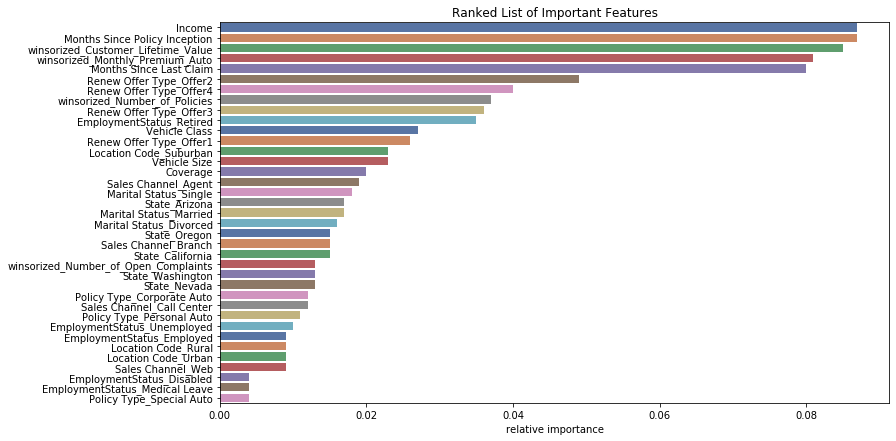

In [112]:
# List the importance of the features ranked from the random forest classifier. 
feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X2.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.title('Ranked List of Important Features')
plt.xlabel('relative importance')
plt.show()

# Extreme Gradient Boosting (XGBoost)

In [113]:
# Predicting 'Response' with a XGBoost classifier.
from xgboost import XGBClassifier

# Initialize the model.
xgbc = XGBClassifier()

# Fit the model to the train set. 
xgbc.fit(X_train_res, y_train_res)

# Prediction.
y_predXGBC = xgbc.predict(X_test)

# Compare the test data with the data.
acc = xgbc.score(X_test, y_test)*100

print("XGBoost Classifier Test Accuracy", round(acc, 2), "%")

XGBoost Classifier Test Accuracy 85.74 %


In [114]:
# 5 k-fold cross validation for XGBoost Classifier.
from sklearn import model_selection
seed = 7
kfold_xgbc = model_selection.KFold(n_splits=5, random_state=seed)
cvresults_xgbc = model_selection.cross_val_score(xgbc, X_train_res, y_train_res, cv=kfold_xgbc)
print(cvresults_xgbc)
print("XGBoost Classifier K-Fold Accuracy", round(results.mean()*100, 2), "%")

[0.76220904 0.78685532 0.80693747 0.80328617 0.82922374]
XGBoost Classifier K-Fold Accuracy 76.83 %


In [115]:
# Python script for confusion matrix for XGBoost Classifier.
cmresults_xgbc = confusion_matrix(y_test, y_predXGBC) 
print ('Confusion Matrix :')
print(cmresults_xgbc) 
print ('Accuracy Score :', accuracy_score(y_test, y_predXGBC)) 
print ('Report : ')
print (classification_report(y_test, y_predXGBC)) 

Confusion Matrix :
[[2320   29]
 [ 362   30]]
Accuracy Score : 0.8573513316307917
Report : 
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      2349
           1       0.51      0.08      0.13       392

    accuracy                           0.86      2741
   macro avg       0.69      0.53      0.53      2741
weighted avg       0.81      0.86      0.81      2741



In [117]:
# Based on the cross-validation scores, XGBoost Classifier will be used for predicting.
# Grid search algorithm will be used to tune the XGBoost Classifier for better accuracy.
from sklearn.model_selection import GridSearchCV
grid_param = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}

xgbc_grid = GridSearchCV(XGBClassifier(),
                     grid_param,
                     verbose = 1,
                     cv=5,
                     n_jobs=-1)

best_modelXGBC = xgbc_grid.fit(X_train_res, y_train_res)

# Print the best n_estimators, max_depth, min_samples_split, min_samples_leaf,
# criterion, and bootstrap from best_model.best_estimator_.get_params().
print('min_child_weight: ', best_modelXGBC.best_estimator_.get_params()['min_child_weight'])
print('gamma: ', best_modelXGBC.best_estimator_.get_params()['gamma'])
print('subsample: ', best_modelXGBC.best_estimator_.get_params()['subsample'])
print('colsample_bytree: ', best_modelXGBC.best_estimator_.get_params()['colsample_bytree'])
print('max_depth: ', best_modelXGBC.best_estimator_.get_params()['max_depth'])

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed:  8.3min finished


min_child_weight:  1
gamma:  0.5
subsample:  0.6
colsample_bytree:  1.0
max_depth:  5


In [118]:
# 5 k-fold cross validation for DTC after gridsearch.
seed = 7

# Fit new logistic regression model with gridsearch results.
modelXGBC = XGBClassifier(min_child_weight=1,
                          gamma=0.5,
                          subsample=0.6,
                          colsample_bytree=1.0,
                          max_depth=5)
modelXGBC = modelXGBC.fit(X_train_res, y_train_res)

kfold_XGBC_grid = model_selection.KFold(n_splits=5, random_state=seed)
results_gridXGBC = model_selection.cross_val_score(modelXGBC, X_train_res, y_train_res, cv=kfold_XGBC_grid)
print(results_gridXGBC)
print("Decision Tree K-Fold Accuracy", round(results_gridXGBC.mean()*100, 2), "%")

[0.90324053 0.90917389 0.91738932 0.96485623 0.98949772]
Decision Tree K-Fold Accuracy 93.68 %


In [119]:
# Predict with new model on test data. 
y_predXGBC_grid = modelXGBC.predict(X_test)

# Python script for confusion matrix for XGBoost Classifier.
cmresults_xgbc = confusion_matrix(y_test, y_predXGBC_grid) 
print ('Confusion Matrix :')
print(cmresults_xgbc) 
print ('Accuracy Score :', accuracy_score(y_test, y_predXGBC_grid)) 
print ('Report : ')
print (classification_report(y_test, y_predXGBC_grid)) 

Confusion Matrix :
[[2347    2]
 [ 392    0]]
Accuracy Score : 0.8562568405691353
Report : 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2349
           1       0.00      0.00      0.00       392

    accuracy                           0.86      2741
   macro avg       0.43      0.50      0.46      2741
weighted avg       0.73      0.86      0.79      2741



# Conclusion

I chose the various classification models because I wanted to predict whether a customer responds to a marketing campaign or  not.  The classificatoin algorithms I chose were k-nearest neighbors, support vector machines, decision tree classifier, random forest classifier, xgboost classifier, and logistic regression.  All of these algorithms will enable me to predict the response of a customer.  

Based on the results, the decision tree classifer had higher evaluation metrics such as Confusion Matrix, Recall, Precision, and F1 score.  These metrics are more important in evaluation of the models due to the imbalance target variable classes.  The accuracy score is not an important metric here.  The accuracy is saying that the model is accurate in predicting just 0's not 1's.  The classification report indicates in several models this is true.  The decision tree classifier has more 1's it predicted; therefore, it has higher evaluation metrics.    

Based on the random forest classifier, I noticed the top 5 important features in predicting a customer's response are winsorized_Customer_Lifetime_Value, Months Since Policy Inception, Income, Months Since Last Claim, and winsorized_Monthly_Premium_Auto.  These are attributes of a customer the marketing team will need to consider when creating their marketing campaigns for the future.

# Regression Models for Predicting Customer Lifetime Value

The ability to predict customer lifetime value (CLV) will allow this company to look at how much value will a customer will bring based on customer's demographics.  I will predict customer lifetime value with regression models because CLV is continuous.  I will investigate various regression models and decide at the end which model will best predict predict customer lifetime value.

In [131]:
# Splitting the data into train and test data.
X3 = results_df.drop(['winsorized_Customer_Lifetime_Value'], 1)
y3 = results_df['winsorized_Customer_Lifetime_Value']


In [132]:
# Eliminate on dummy variable from each categorical variable.
X3 = X3.drop(['EmploymentStatus_Unemployed',
                        'Location Code_Rural',
                        'Marital Status_Divorced',
                        'Policy Type_Corporate Auto',
                        'Renew Offer Type_Offer1',
                        'Sales Channel_Agent'], 1)

In [139]:
# Split the categorical and numeric variables to analyze seperately.
num_X3 = [f for f in X3.columns if X3.dtypes[f] != 'uint8']
cat_X3 = [f for f in X3.columns if X3.dtypes[f] == 'uint8']

In [140]:
# Create data frame of the numeric variables.
num_X3 = X3[num_X3]

In [141]:
# Normalizing the numeric predictor variables due to skewness in their distributions.
# Apply PowerTransformer to the training set.
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
scaled_num_X3 = pt.fit_transform(num_X3)
num_X3 = pd.DataFrame(scaled_num_X3, columns=num_X3.columns)

In [142]:
# Create data frame of the categorical variable.
cat_X3 = X3[cat_X3]

In [143]:
# Merging num and cat X_train data frames.
X3 = pd.concat([num_X3.reset_index(drop=True), cat_X3.reset_index(drop=True)], axis=1)

In [ ]:
# Split data into training and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.3, random_state=3)

In [115]:
# Split the categorical and numeric variables to analyze seperately.
num_X_train = [f for f in X_train.columns if X_train.dtypes[f] != 'uint8']
cat_X_train = [f for f in X_train.columns if X_train.dtypes[f] == 'uint8']

In [116]:
# Create data frame of the numeric variables.
num_X_train = X_train[num_X_train]

In [117]:
# Normalizing the numeric predictor variables due to skewness in their distributions.
# Apply PowerTransformer to the training set.
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
scaled_num_X_train = pt.fit_transform(num_X_train)
num_X_train = pd.DataFrame(scaled_num_X_train, columns=num_X_train.columns)

In [118]:
# Create data frame of the categorical variable.
cat_X_train = X_train[cat_X_train]

In [119]:
# Merging num and cat X_train data frames.
X_train = pd.concat([num_X_train.reset_index(drop=True), cat_X_train.reset_index(drop=True)], axis=1)

# Linear Regression Model (LRM)

In [127]:
# Initializing and fitting the data to linear regression model.
lrm = LinearRegression(fit_intercept=True)
lrm.fit(X_train, y_train)

# Make predictions.
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.2933108680888983
-----Test set statistics-----
R-squared of the model in test set is: -2239.4599586141676
Mean absolute error of the prediction is: 159524.7207161457
Mean squared error of the prediction is: 37626800196.4733
Root mean squared error of the prediction is: 193976.28771701272
Mean absolute percentage error of the prediction is: 3131.972568328884


In [146]:
# 10 k-fold cross validation for linear regression.
from sklearn import model_selection
seed = 7
kfold_lrm = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(lrm, X3, y3, cv=kfold_lrm)
print(results)
print("Linear Regression K-Fold R-squared", round(results.mean()*100, 2), "%")

[0.28368285 0.28002697 0.29886478 0.26132811 0.33335869 0.27016954
 0.31406432 0.30980475 0.25879993 0.29942001]
Linear Regression K-Fold R-squared 29.1 %


# K-Nearest Neighbors Regressor

In [148]:
# Predicting 'Customer Lifetime Value' with k-nearest neighbors regression.
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model.
knnr = KNeighborsRegressor(n_neighbors = 38) # n_neighbors means k

# Fit the model to the train set.
knnr.fit(X_train, y_train)

# Prediction.
y_preds_train = knnr.predict(X_train)
y_preds_test = knnr.predict(X_test)

print("R-squared of the model in training set is: {}".format(knnr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(knnr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.4398424197738217
-----Test set statistics-----
R-squared of the model in test set is: -0.39501450252365483
Mean absolute error of the prediction is: 4259.052600758895
Mean squared error of the prediction is: 23428194.623976994
Root mean squared error of the prediction is: 4840.268032245424
Mean absolute percentage error of the prediction is: 96.96873239279907


In [123]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20, 40):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred = model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  21 is: 4940.211443536397
RMSE value for k=  22 is: 4924.656179890861
RMSE value for k=  23 is: 4914.032928457374
RMSE value for k=  24 is: 4904.561032018992
RMSE value for k=  25 is: 4886.236947494845
RMSE value for k=  26 is: 4872.994052986621
RMSE value for k=  27 is: 4876.11977645066
RMSE value for k=  28 is: 4868.3094272813005
RMSE value for k=  29 is: 4862.144118711744
RMSE value for k=  30 is: 4861.9587452730375
RMSE value for k=  31 is: 4862.0398097531715
RMSE value for k=  32 is: 4861.251098503958
RMSE value for k=  33 is: 4863.448164230332
RMSE value for k=  34 is: 4872.586808911635
RMSE value for k=  35 is: 4865.701623254405
RMSE value for k=  36 is: 4855.257310479415
RMSE value for k=  37 is: 4842.930266103085
RMSE value for k=  38 is: 4841.125719230838
RMSE value for k=  39 is: 4847.4129381279945
RMSE value for k=  40 is: 4853.414708658531


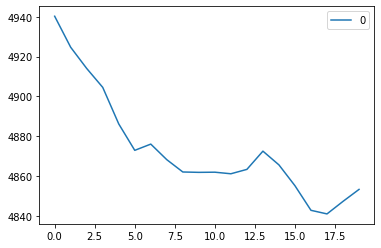

In [124]:
# Plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [96]:
# 10 k-fold cross validation for KNN regression.
from sklearn import model_selection
seed = 7
kfold_knnr = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(knnr, X_train, y_train, cv=kfold_knnr)
print(results)
print("KNN Regression K-Fold R-squared: ", round(results.mean()*100, 2), "%")

[0.39133776 0.39531637 0.39619217 0.44466437 0.40909833 0.40638743
 0.34622399 0.39356859 0.40441012 0.3860561 ]
KNN Regression K-Fold R-squared:  39.73 %


# Support Vector Machine Regressor

In [149]:
# Predicting 'Customer Lifetime Value' with support vector machine regression.
from sklearn.svm import SVR
# Initialize the model.
svr = SVR(kernel='rbf')

# Fit the model to the train set.
svr.fit(X_train, y_train)

# Prediction.
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)

print("R-squared of the model in training set is: {}".format(svr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(svr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: -0.07150077443233838
-----Test set statistics-----
R-squared of the model in test set is: -0.09640782172641525
Mean absolute error of the prediction is: 4259.052600758895
Mean squared error of the prediction is: 23428194.623976994
Root mean squared error of the prediction is: 4840.268032245424
Mean absolute percentage error of the prediction is: 96.96873239279907


In [150]:
# 10 k-fold cross validation for support vector regression.
from sklearn import model_selection
seed = 7
kfold_svr = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(svr, X3, y3, cv=kfold_svr)
print(results)
print("Support Vector Regression K-fold R-squared: ", round(results.mean()*100, 2), "%")

[-0.05866537 -0.07037309 -0.06007209 -0.0527766  -0.09081168 -0.09761337
 -0.07968949 -0.04506959 -0.06669852 -0.07239992]
Support Vector Regression K-fold R-squared:  -6.94 %


In [102]:
# Check r-squared for different kernels.
confidence = svr.score(X_test, y_test)
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear -2004700.116683468
poly -1.3770946210318504e+19
rbf -0.09640782172641525
sigmoid -0.07854736396254602


# Decision Tree Regressor

In [151]:
# Predicting 'Response' with a decision tree classifier.
from sklearn.tree import DecisionTreeRegressor

# Initialize the model.
dtr = DecisionTreeRegressor()

# Fit the model to the train set. 
dtr.fit(X_train, y_train)

# Prediction.
y_pred_train = dtr.predict(X_train)
y_pred_test = dtr.predict(X_test)

print("R-squared of the model in training set is: {}".format(dtr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(dtr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: -3.0529674820028294
Mean absolute error of the prediction is: 4259.052600758895
Mean squared error of the prediction is: 23428194.623976994
Root mean squared error of the prediction is: 4840.268032245424
Mean absolute percentage error of the prediction is: 96.96873239279907


In [154]:
# 10 k-fold cross validation for decision tree regression.
from sklearn import model_selection
seed = 7
kfold_dtr = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(dtr, X3, y3, cv=kfold_dtr)
print(results)
print("Decision Tree Regression K-Fold R-squared", round(results.mean()*100, 2), "%")

[0.82617447 0.79718843 0.83042151 0.78307027 0.81597    0.77384987
 0.82319433 0.84795857 0.7882057  0.83033635]
Decision Tree Regression K-Fold R-squared 81.16 %


# Random Forest Regressor

In [153]:
# Predicting 'Customer Lifetime Value' with a random forest regression.
from sklearn.ensemble import RandomForestRegressor
# Initialize the model.
rfreg = RandomForestRegressor()

# Fit the model to the train set. 
rfreg.fit(X_train, y_train)

# Prediction.
y_pred_train = rfreg.predict(X_train)
y_pred_test = rfreg.predict(X_test)

print("R-squared of the model in training set is: {}".format(rfreg.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(rfreg.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.9859374462601592
-----Test set statistics-----
R-squared of the model in test set is: -2.9227587383113285
Mean absolute error of the prediction is: 4259.052600758895
Mean squared error of the prediction is: 23428194.623976994
Root mean squared error of the prediction is: 4840.268032245424
Mean absolute percentage error of the prediction is: 96.96873239279907


In [156]:
# 10 k-fold cross validation for random forest regression.
from sklearn import model_selection
seed = 7
kfold_rfreg = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(rfreg, X3, y3, cv=kfold_rfreg)
print(results)
print("Random Forest Regression K-Fold R-squared", round(results.mean()*100, 2), "%")

[0.90540192 0.89226248 0.896961   0.90107103 0.91541754 0.87467716
 0.91102924 0.92022497 0.88202836 0.90755312]
Random Forest Regression K-Fold R-squared 90.07 %


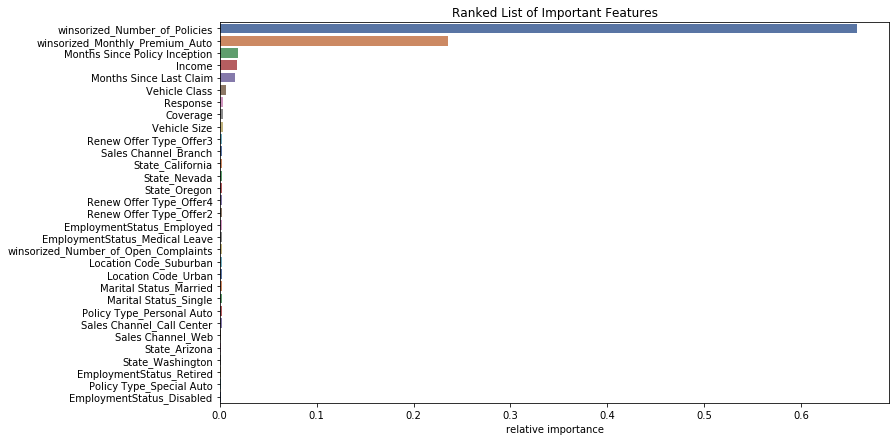

In [157]:
# List the importance of the features ranked.  
feature_imp_reg = rfreg.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp_reg, index=X3.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.title('Ranked List of Important Features')
plt.xlabel('relative importance')
plt.show()

# Extreme Gradient Boost Regressor

In [158]:
# Predicting 'Customer Lifetime Value' with a XGBoost regression.
from xgboost import XGBRegressor

# Initialize the model.
xgbr = XGBRegressor()

# Fit the model to the train set. 
xgbr.fit(X_train, y_train)

# Prediction.
y_pred_train = xgbr.predict(X_train)
y_pred_test = xgbr.predict(X_test)

print("R-squared of the model in training set is: {}".format(xgbr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(xgbr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

[15:54:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-squared of the model in training set is: 0.8995275542175715
-----Test set statistics-----
R-squared of the model in test set is: -2.879347749945133
Mean absolute error of the prediction is: 4259.052600758895
Mean squared error of the prediction is: 23428194.623976994
Root mean squared error of the prediction is: 4840.268032245424
Mean absolute percentage error of the prediction is: 96.96873239279907


In [159]:
# 10 k-fold cross validation for xgboost regression.
from sklearn import model_selection
seed = 7
kfold_xgbr = model_selection.KFold(n_splits=10, random_state=seed)
results = model_selection.cross_val_score(xgbr, X3, y3, cv=kfold_xgbr)
print(results)
print("XGBoost Regression K-Fold Accuracy", round(results.mean()*100, 2), "%")

[15:55:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:55:21] WARNI

# Conclusion

The best performing regression model is the random forest regressor with a cross validation r-squared of 90.07%.  I think the random forest regressor will be the best model to predict CLV.  The top 5 important customer attributes in predicting CLV are winsorized_Number_of_Policies, winsorized_Monthly_Premium_Auto, Months Since Policy Inception, Income, and Months Since Last Claim.  These attributes will inform the company to focus their attention on analyzing these attributes to increase CLV.  These attributes should be tracked and measured to inform the business on the value customers are adding to the business.  Future research can be done to segment customers with these attributes.